# Dataset 3: Dimond Price Prediction Data

## Setup the Environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
dimond_df = pd.read_csv("diamonds.csv")
print(dimond_df.shape)
dimond_df.sample(5)

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26706,26707,0.32,Very Good,H,VVS2,60.2,60.0,645,4.45,4.48,2.69
467,468,0.80,Ideal,H,SI1,61.0,57.0,2818,6.07,6.00,3.68
49814,49815,0.59,Ideal,G,VVS1,61.5,57.0,2166,5.40,5.46,3.34
48051,48052,0.54,Ideal,G,VVS2,61.9,55.0,1927,5.20,5.30,3.25
49937,49938,0.70,Ideal,I,SI1,62.6,56.0,2187,5.66,5.69,3.55


In [3]:
# remove the "price" column and save it to a variable
price_col = dimond_df.pop('price')

# add the "price" column back to the DataFrame as the last column
dimond_df['price'] = price_col

In [4]:
dimond_df.describe().style.background_gradient(cmap = 'YlGnBu')

,Unnamed: 0,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


Highest Price is 18823.

## Plot the missing Value

Text(0, 0.5, 'Samples')

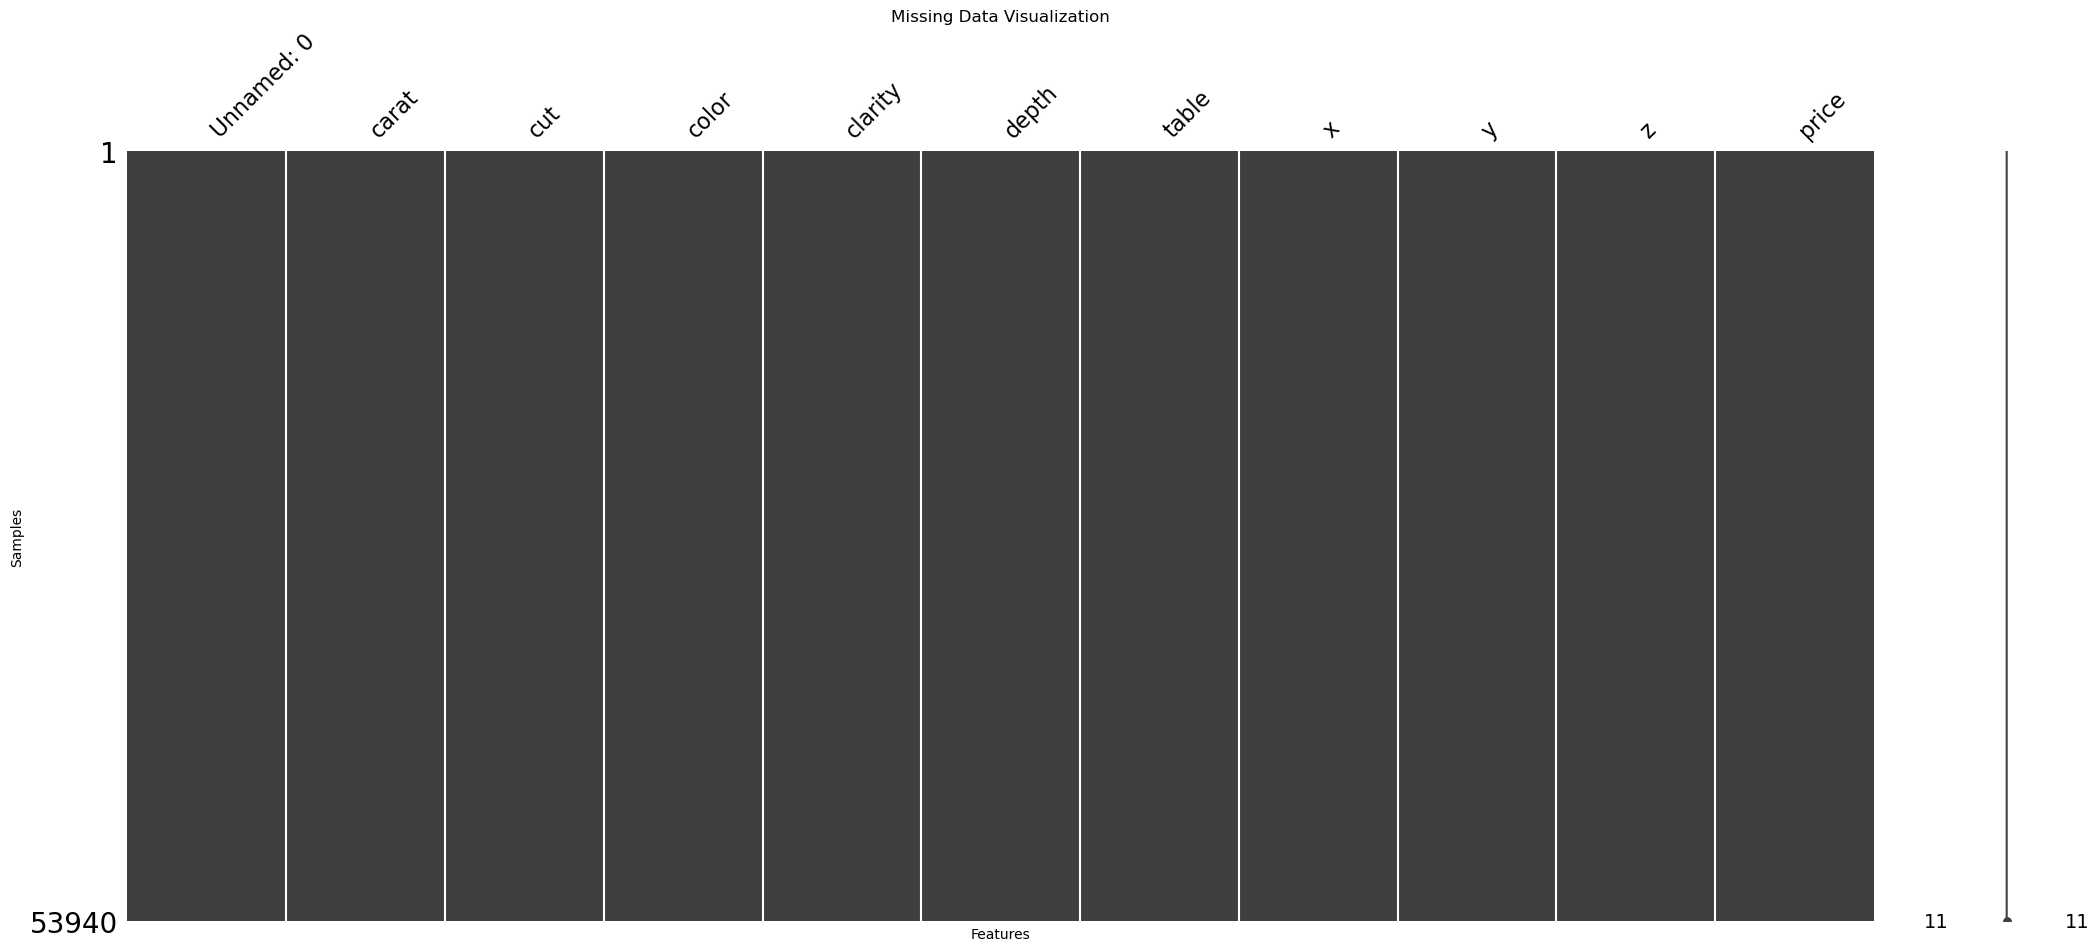

In [5]:
msno.matrix(dimond_df)
plt.title('Missing Data Visualization')
plt.xlabel('Features')
plt.ylabel('Samples')

In [6]:
dimond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Print the Unique value count.

In [7]:
for col in dimond_df.columns:
    unique_values = dimond_df[col].nunique()
    print('{} -->'.format(col), unique_values)
    print('---------------------')

Unnamed: 0 --> 53940
---------------------
carat --> 273
---------------------
cut --> 5
---------------------
color --> 7
---------------------
clarity --> 8
---------------------
depth --> 184
---------------------
table --> 127
---------------------
x --> 554
---------------------
y --> 552
---------------------
z --> 375
---------------------
price --> 11602
---------------------


**Drop the 'Unnamed: 0' colmn**

In [8]:
# 'Unnamed: 0' column is for sl no.
dimond_df.drop(['Unnamed: 0'],axis=1,inplace=True)

**Plot Price Distribution**

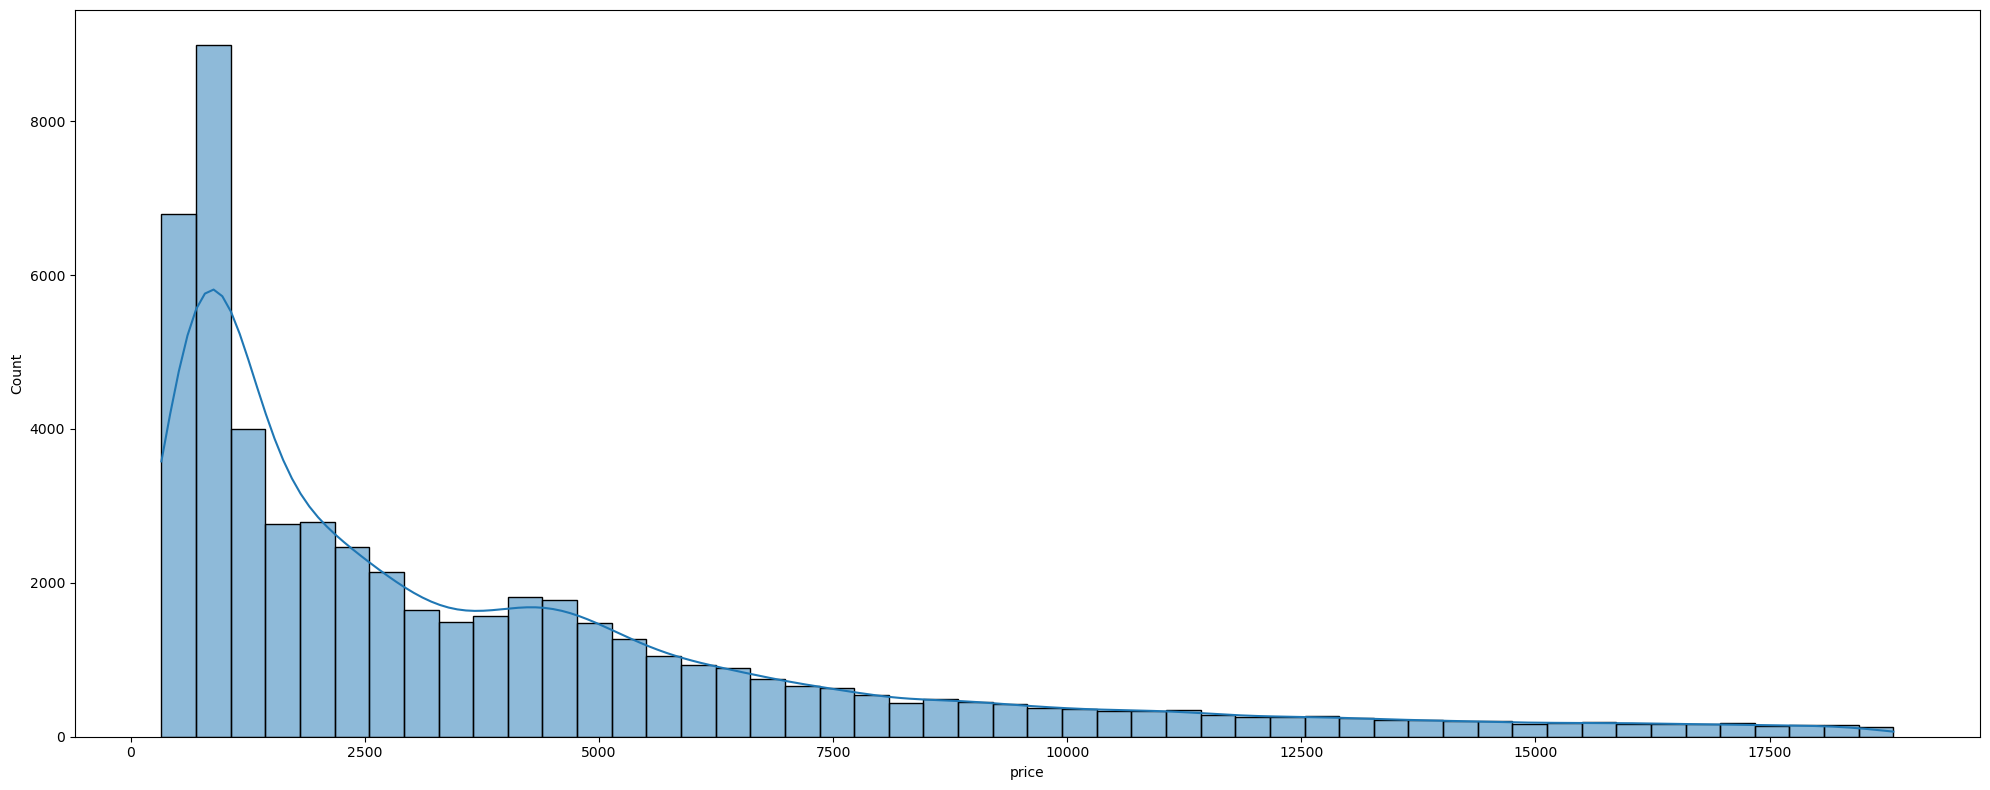

In [9]:
plt.figure(figsize=(20,8))
sns.histplot(x=dimond_df['price'],bins=50,kde=True)
plt.tight_layout()
plt.show()

**Scater Plot**

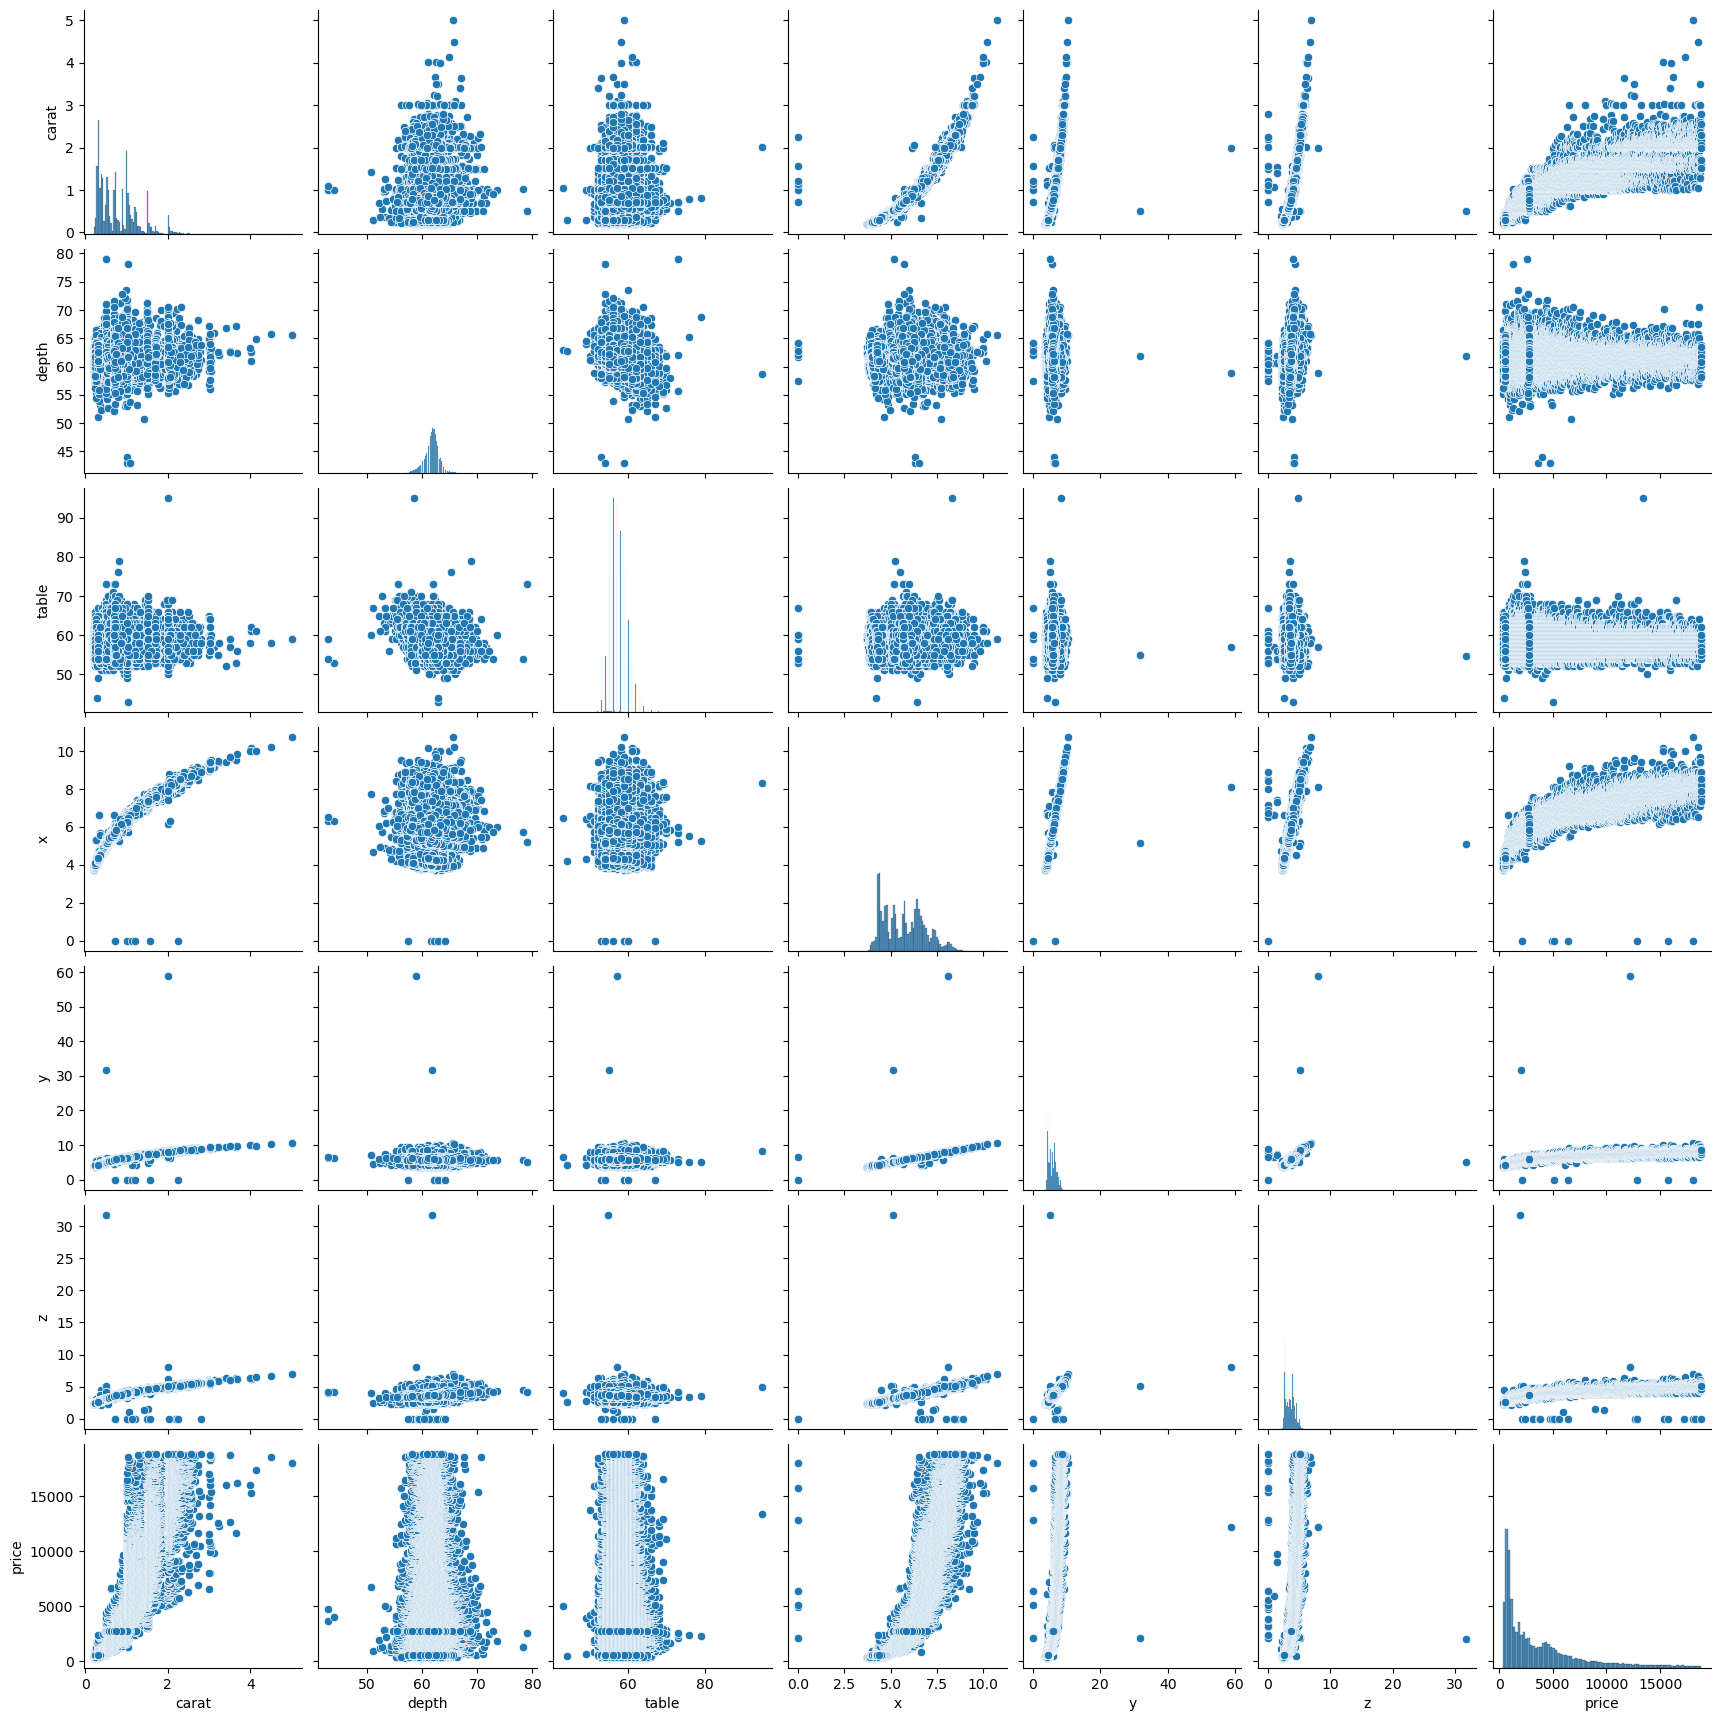

In [10]:
sns.pairplot(dimond_df)

**Box Plot**

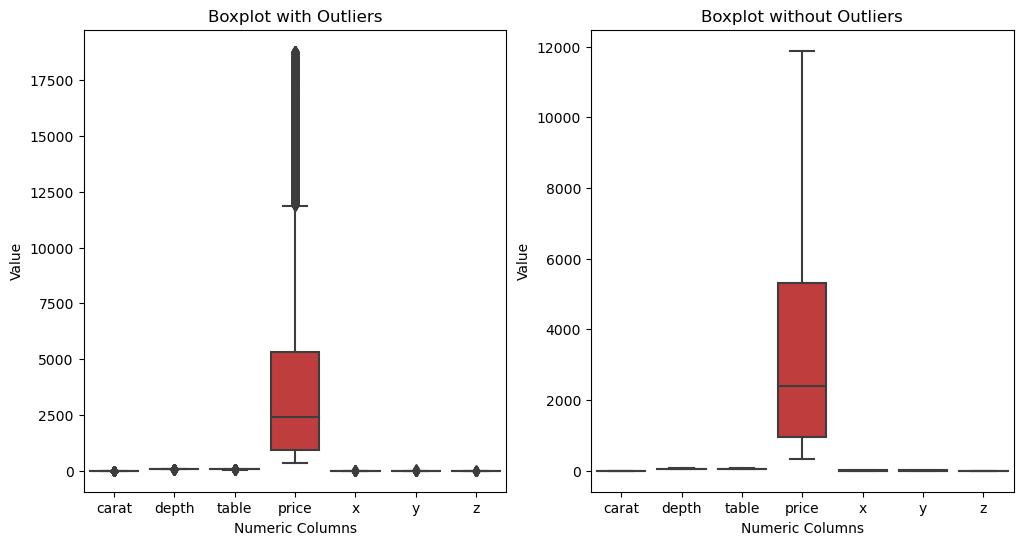

In [11]:
# Select the numeric columns
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
#num_df = dimond_df[num_cols]

# Create a figure with two subplots
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

# Plot the boxplots using matplotlib and seaborn
sns.boxplot(data=dimond_df[num_cols], ax=ax[0])
sns.boxplot(data=dimond_df[num_cols], ax=ax[1], showfliers=False)

# Set the titles and axis labels
ax[0].set_title('Boxplot with Outliers')
ax[1].set_title('Boxplot without Outliers')
ax[0].set_xlabel('Numeric Columns')
ax[1].set_xlabel('Numeric Columns')
ax[0].set_ylabel('Value')
ax[1].set_ylabel('Value')

# Display the plot
plt.show()

**Outliers Remove**

In [12]:
# Compute the IQR
Q1 = dimond_df['price'].quantile(0.25)
Q3 = dimond_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
outlier_indices = np.where((dimond_df['price'] < lower_bound) | (dimond_df['price'] > upper_bound))
# Remove the outliers
dimond_df = dimond_df.drop(outlier_indices[0], axis=0)

**Correlation Matrix Plot**

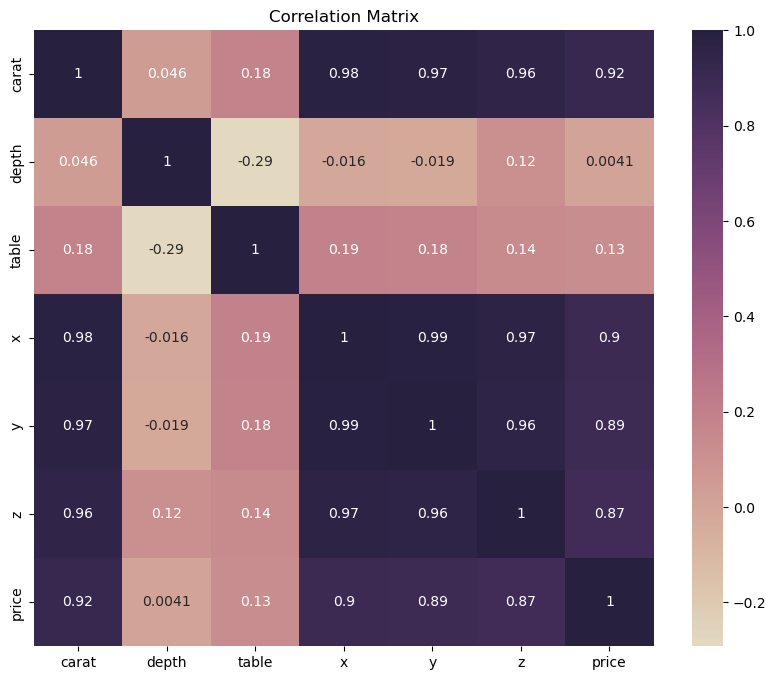

In [13]:
# Calculate the correlation matrix
corr = dimond_df.corr()
# Create a custom color map
cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap=cmap, ax=ax)

# Set the title and display the plot
ax.set_title('Correlation Matrix')
plt.show()

## SciKit Library Use-

In [14]:
scikit_learn_df = dimond_df

**Data Conversion**

In [15]:
# Convert the categorical variables to numerical using one-hot encoding
scikit_learn_df = pd.get_dummies(scikit_learn_df, columns=['cut'])

le = LabelEncoder()
# Encode the 'color' and 'clarity' columns
scikit_learn_df['color'] = le.fit_transform(scikit_learn_df['color'])
scikit_learn_df['clarity'] = le.fit_transform(scikit_learn_df['clarity'])

In [16]:
# Get the column names of the numerical columns
numerical_cols = ["carat", "depth", "table", "x", "y", "z"]

# Standardize the numerical columns using the StandardScaler class
scaler = StandardScaler()
scikit_learn_df[numerical_cols] = scaler.fit_transform(scikit_learn_df[numerical_cols])

In [17]:
scikit_learn_df.head(5)

,carat,color,clarity,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.286390,1,3,-0.178648,-1.086338,-1.641398,-1.616069,-1.615376,326,0,0,1,0,0
1,-1.338507,1,2,-1.366823,1.604979,-1.701708,-1.756925,-1.805727,326,0,0,0,1,0
2,-1.286390,1,4,-3.393710,3.399190,-1.540882,-1.525520,-1.805727,327,0,1,0,0,0
3,-1.130040,5,5,0.450386,0.259320,-1.390107,-1.364542,-1.298125,334,0,0,0,1,0
4,-1.077923,6,3,1.079420,0.259320,-1.249384,-1.243809,-1.107775,335,0,1,0,0,0


**Split The dataset**

In [18]:
X = scikit_learn_df.drop(['price'],axis=1)
y =scikit_learn_df['price']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Preparation and Evalution**

In [20]:
models = [
    KNeighborsRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=123),   
]

In [21]:
score_dict={}
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    score_dict[model_name]={
        "MAE":mean_absolute_error(y_test,pred),
        "MSE":mean_squared_error(y_test,pred),
        "RMSE": mean_squared_error(y_test,pred, squared=False),
        "R2":r2_score(y_test,pred), 
    }

In [22]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('RMSE')
score_pd

,MAE,MSE,RMSE,R2
RandomForestRegressor,204.163951,138626.853160,372.326272,0.981204
KNeighborsRegressor,295.992877,260940.885845,510.823733,0.964620


## pycaret Library

In [23]:
from pycaret.regression import *

In [24]:
pycaret_df = dimond_df

**Initialize the setup**

In [25]:
# initialize the setup
reg_setup = setup(data=pycaret_df, 
                  target='price',
                  numeric_features=['carat','depth', 'table', 'x', 'y', 'z'], 
                  categorical_features=['cut', 'color', 'clarity'], 
                  session_id=123, 
                  normalize=True, 
                  transformation=True)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(50400, 10)"
4,Transformed data shape,"(50400, 27)"
5,Transformed train set shape,"(35280, 27)"
6,Transformed test set shape,"(15120, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


**Create Model**

In [26]:
# create a RandomForestRegressor model
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,207.0761,143799.0136,379.2084,0.9810,0.0903,0.0659
1,216.3961,154621.0683,393.2189,0.9806,0.0904,0.0658
2,211.0235,146044.3957,382.1576,0.9807,0.0908,0.0664
3,205.8327,138746.2228,372.4865,0.9814,0.0884,0.0639
4,210.1901,151250.4422,388.9093,0.9796,0.0936,0.0672
5,221.0726,159167.4103,398.9579,0.9792,0.0948,0.0687
6,218.0228,155988.6976,394.9540,0.9798,0.0932,0.0664
7,214.0536,161845.0577,402.2997,0.9790,0.0918,0.0655
8,213.2443,170641.4114,413.0877,0.9770,0.0989,0.0679


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
# create a KNeighborsRegressor model
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,353.6503,465748.4712,682.4577,0.9384,0.1743,0.1231
1,365.0721,454834.1983,674.4140,0.9429,0.1702,0.1222
2,346.6577,396485.2408,629.6707,0.9477,0.1673,0.1234
3,339.3035,417201.4838,645.9114,0.9442,0.1600,0.1167
4,358.4965,456329.3325,675.5215,0.9385,0.1716,0.1260
5,358.8750,411654.4971,641.6031,0.9461,0.1655,0.1211
6,349.9234,420956.0500,648.8113,0.9454,0.1631,0.1192
7,357.2286,451735.8430,672.1130,0.9413,0.1662,0.1205
8,354.1256,435964.2360,660.2759,0.9413,0.1760,0.1259


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Compare the regression model**

In [28]:
# compare models
compare_models(include=['rf', 'knn'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,212.8862,153017.0485,391.0074,0.9799,0.0930,0.0665,1.7230
knn,K Neighbors Regressor,353.2703,433432.0895,658.1479,0.9430,0.1678,0.1217,10.0510


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=123)